In [2]:
%matplotlib inline

from pymc3 import  *
import pymc3 as pm

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import json
import arviz
from sklearn import preprocessing

In [3]:
pm.__version__

'3.7'

In [4]:
Ward_IMD = json.load(open('Ward_index_deprivation.json'))

ward = {'GSS_CODE': [] , 'IMD' : []}
for k in Ward_IMD:
    ward['GSS_CODE'].append(k)
    ward['IMD'].append(Ward_IMD[k])
wardDf = pd.DataFrame.from_dict(ward)

theData = pd.read_csv('Merged_all_disease_green_sat.csv')

In [5]:
data = pd.merge(theData,wardDf,left_on='GSS_CODE' , right_on='GSS_CODE')

In [6]:
len(data)

424

In [7]:
list(data.columns)

['Unnamed: 0',
 'green_score',
 'GSS_CODE',
 'tree_pixels',
 'grass_pixels',
 'urban_pixels',
 'npix',
 'tree_pct',
 'grass_pct',
 'urban_pct',
 'borough_name_x',
 'TreePixelDensity',
 'TreeDensity',
 'psoriasis_Prescriptions',
 'psoriasis_Prevalence',
 "Meniere's disease_Prescriptions",
 "Meniere's disease_Prevalence",
 "crohn's disease_Prescriptions",
 "crohn's disease_Prevalence",
 'gastroparesis_Prescriptions',
 'gastroparesis_Prevalence',
 'irritable bowel syndrome_Prescriptions',
 'irritable bowel syndrome_Prevalence',
 'parkinson_Prescriptions',
 'parkinson_Prevalence',
 'sleep apnea_Prescriptions',
 'sleep apnea_Prevalence',
 'interstitial cystitis_Prescriptions',
 'interstitial cystitis_Prevalence',
 'bipolar_Prescriptions',
 'bipolar_Prevalence',
 'hypothyroidism_Prescriptions',
 'hypothyroidism_Prevalence',
 'dementia_Prescriptions',
 'dementia_Prevalence',
 'rheumatoid_Prescriptions',
 'rheumatoid_Prevalence',
 'depression_Prescriptions',
 'depression_Prevalence',
 'diabete

In [8]:
len(data)

424

In [9]:
# size = 200
# true_intercept = 1
# true_slope = 2

# x = np.linspace(0, 1, size)
# # y = a + b*x
# true_regression_line = true_intercept + true_slope * x
# # add noise
# y = true_regression_line + np.random.normal(scale=.5, size=size)

# data = dict(x=x, y=y)

In [10]:
# y.shape
# x.shape

In [11]:

# fig = plt.figure(figsize=(7, 7))
# ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
# ax.plot(x, y, 'o', label='sampled data')
# ax.plot(x, true_regression_line, label='true regression line', lw=2.)
# plt.legend(loc=0);

In [12]:
# basic_model = pm.Model()
# with basic_model: # model specifications in PyMC3 are wrapped in a with-statement
#     # Define priors
#     sigma = HalfNormal('sigma', 1)
#     intercept = Normal('Intercept', 0, sd=20)
#     x_coeff = Normal('x', 0, sd=20)

#     # Define likelihood
#     likelihood = Normal('y', mu=intercept + x_coeff * x,
#                         sd=sigma, observed=y)

#     # Inference!
#     trace = sample(200) # draw 3000 posterior samples using NUTS sampling

In [13]:
# with Model() as model:
#     # specify glm and pass in data. The resulting linear model, its likelihood and
#     # and all its parameters are automatically added to our model.
#     glm.GLM.from_formula('y ~ x', data)
#     trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

In [14]:
# with basic_model:
#     # draw 500 posterior samples
#     trace = py3.sample(500)



In [15]:
# features_to_normalize = ['Resp_deaths', 'All_Deaths']
# data[features_to_normalize] = data[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [16]:
# new_df = data.filter(['TreeDensity','TreePixelDensity','avg_age','IMD','depression_Prescriptions',''], axis=1)

In [17]:
X_dims = ['avg_age', 'IMD', 'avg_age', 'pixelDensity_tree', 'TreeDensity', 'TreePixelDensity','people_per_sq_km','UA_Green urban areas PCT']
Y_dims = ['depression_Prescriptions']

X = np.array(data[X_dims].values)
Y = np.array(data[Y_dims].values)
min_max_scaler = preprocessing.MinMaxScaler() #StandardScaler() #MinMaxScaler()
X = min_max_scaler.fit_transform(X)
Y = min_max_scaler.fit_transform(Y)

X_pm = X.transpose()
Y_pm = Y.transpose()[0]
# Y_dims = ['diabetes_Prescriptions']

In [18]:
print('building model')
basic_model = pm.Model()
num_datapoints = 100
num_samples = 100
with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=len(X_pm))
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    #mu = alpha + beta[0]*X_pm[0] + beta[1]*X_pm[1]
    beta_terms = [beta[i] * X_pm[i][0:num_datapoints] for i in range(0,len(X_pm))]
    mu = alpha + sum(beta_terms)

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y[0:num_datapoints])

building model


In [19]:
print('sampling')
with basic_model:
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    trace = pm.sample(1000, step,tune=10000)

sampling


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains: 100%|██████████| 44000/44000 [56:10<00:00, 13.05draws/s] 
The acceptance probability does not match the target. It is 0.9075010377860911, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9159086102175812, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is small

In [24]:
X1=np.array(data['avg_age'].values,dtype=np.float32)
X2=np.array(data['IMD'].values,dtype=np.float32)
X3=np.array(data['avg_age'].values,dtype=np.float32)
X4=np.array(data['pixelDensity_tree'].values,dtype=np.float32)
X5=np.array(data['TreeDensity'].values,dtype=np.float32)
X6=np.array(data['TreePixelDensity'].values,dtype=np.float32)
X7=np.array(data['people_per_sq_km'].values,dtype=np.float32)
X8=np.array(data['UA_Green urban areas PCT'].values,dtype=np.float32)


Y=np.array(data['depression_Prescriptions'].values,dtype=np.float32)

oslaua_idx = np.array(data['GSS_CODE'].values,dtype=np.float32)
n_oslauas = len(data['GSS_CODE'].unique())

print('building model')
hierarchical_model = pm.Model()
num_datapoints = 100
num_samples = 100
with hierarchical_model:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sd=100)
    sigma_a = pm.HalfNormal('sigma_a', 5.)
    a = pm.Normal('a', mu=mu_a, sd=sigma_a,shape=n_oslauas)
    
    mu_b1 = pm.Normal('mu_b1', mu=0., sd=100)
    sigma_b1 = pm.HalfNormal('sigma_b1', 5.)
    b1 = pm.Normal('b1', mu=mu_b1, sd=sigma_b1,shape=n_oslauas)
    
    mu_b2 = pm.Normal('mu_b2', mu=0., sd=100)
    sigma_b2 = pm.HalfNormal('sigma_b2', 5.)
    b2 = pm.Normal('b2', mu=mu_b2, sd=sigma_b2,shape=n_oslauas)
    
    mu_b3 = pm.Normal('mu_b3', mu=0., sd=100)
    sigma_b3 = pm.HalfNormal('sigma_b3', 5.)
    b3 = pm.Normal('b3', mu=mu_b3, sd=sigma_b3,shape=n_oslauas)
    
    mu_b4 = pm.Normal('mu_b4', mu=0., sd=100)
    sigma_b4 = pm.HalfNormal('sigma_b4', 5.)
    b4 = pm.Normal('b4', mu=mu_b4, sd=sigma_b4,shape=n_oslauas)
    
    mu_b5 = pm.Normal('mu_b5', mu=0., sd=100)
    sigma_b5 = pm.HalfNormal('sigma_b5', 5.)
    b5 = pm.Normal('b5', mu=mu_b5, sd=sigma_b5,shape=n_oslauas)
    
    mu_b6 = pm.Normal('mu_b6', mu=0., sd=100)
    sigma_b6 = pm.HalfNormal('sigma_b6', 5.)
    b6 = pm.Normal('b6', mu=mu_b6, sd=sigma_b6,shape=n_oslauas)
    
    mu_b7 = pm.Normal('mu_b7', mu=0., sd=100)
    sigma_b7 = pm.HalfNormal('sigma_b7', 5.)
    b7 = pm.Normal('b7', mu=mu_b7, sd=sigma_b7,shape=n_oslauas)
    
    mu_b8 = pm.Normal('mu_b8', mu=0., sd=100)
    sigma_b8 = pm.HalfNormal('sigma_b8', 5.)
    b8 = pm.Normal('b8', mu=mu_b8, sd=sigma_b8,shape=n_oslauas)
    
    # Model error
    eps = pm.HalfCauchy('eps', 5.)
    
    estimate = a[oslaua_idx] + b1[oslaua_idx]*X1 + b2[oslaua_idx]*X2 + b3[oslaua_idx]*X3 + b4[oslaua_idx]*X4 + b5[oslaua_idx]*X5 + b6[oslaua_idx]*X6 + b7[oslaua_idx]*X7 + b8[oslaua_idx]*X8 
    # Likelihood (sampling distribution) of observations
    likelihood = pm.Normal('likelihood', mu=estimate, sd=eps, observed=Y)

ValueError: could not convert string to float: 'E05000420'

In [ ]:
with hierarchical_model:
    hierarchical_trace = pm.sample(10000, tune=10000, target_accept=.9)

In [68]:
trace[2]

{'alpha': 0.32849517,
 'beta': array([-1.1613104e+01, -6.2840129e-04,  1.1611056e+01, -3.6477500e-03,
        -1.0468773e-02, -3.8074374e-03,  8.7667583e-04, -6.5452601e-03],
       dtype=float32),
 'sigma_log__': -2.193115,
 'sigma': 0.111568674}

In [65]:
import seaborn as sns

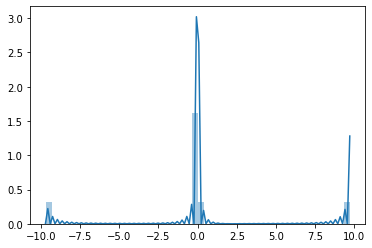

In [71]:
sns.distplot(trace[4]['beta'])

In [64]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace[1]['beta'])
plt.tight_layout();

ImportError: ArviZ is not installed. In order to use `plot_trace`:
pip install arviz

<Figure size 504x504 with 0 Axes>

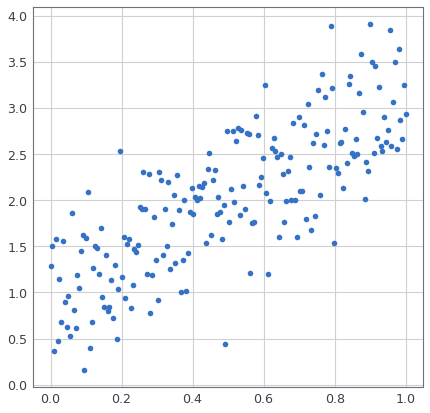

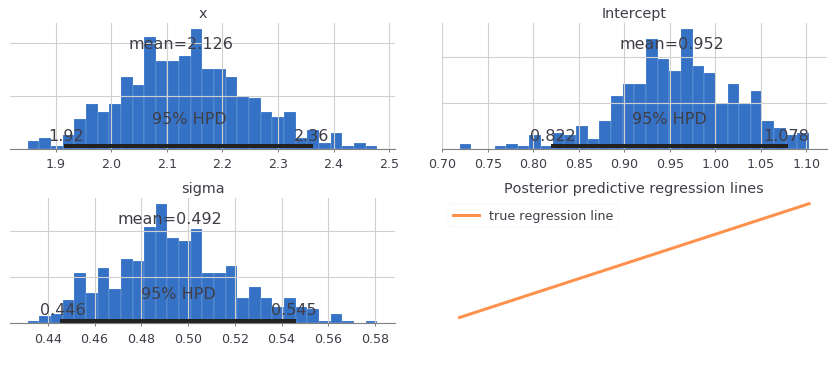

In [38]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'o', label='data')
py3.plot_posterior(trace,
                              label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');